<a href="https://colab.research.google.com/github/adrienpayong/educativecourse/blob/main/cothreholding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import cv2
import os


class Thresholding:
    def __init__(self, path):
        self.image_path = path
        self.image = cv2.imread(self.image_path, 0)

    def simple_thres(self):
        """If the pixel value is smaller than the threshold, it is set to 0, otherwise it is set to a maximum value."""
        """ can be used directly as cv2.threshold """
        """options can be 
            cv2.THRESH_BINARY
            cv2.THRESH_BINARY_INV
            cv2.THRESH_TRUNC
            cv2.THRESH_TOZERO
            cv2.THRESH_TOZERO_INV
        """
        ret, thresh1 = cv2.threshold(self.image, 127, 255, cv2.THRESH_BINARY)
        cv2.imwrite(os.path.join("simple_thres.jpg"), thresh1)

    def adaptive_thres(self):
        """Should be used where  an image has different lighting conditions in different areas.algorithm determines
        the threshold for a pixel based on a small region around it """
        """Threshold can be calculated as given two methods:
         1) cv2.ADAPTIVE_THRESH_MEAN_C: The threshold value is 
                the mean of the neighbourhood area minus the constant C.
         2) cv2.ADAPTIVE_THRESH_GAUSSIAN_C:The threshold 
                value is a gaussian-weighted sum of the neighbourhood values minus the constant C.  
        """
        img = cv2.medianBlur(self.image, 5)
        th2 = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 2)
        cv2.imwrite(os.path.join("adaptive_thres.jpg"), th2)

    def otsu_binarization(self):
        """Consider an image with only two distinct image values (bimodal image), where the histogram would only
        consist of two peaks. A good threshold would be in the middle of those two values. Similarly, Otsu's method
        determines an optimal global threshold value from the image histogram """

        # Otsu's thresholding after Gaussian filtering
        blur = cv2.GaussianBlur(self.image, (5, 5), 0)
        ret3, th3 = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
        cv2.imwrite(os.path.join("otsu_binarized_thres.jpg"), th3)

In [2]:
# image thresholding
image_path_src = os.path.join("blue_cap.jpg")
thres_obj = Thresholding(image_path_src)
thres_obj.simple_thres()   ## simple thresholding
thres_obj.adaptive_thres() ## Adaptative threholding
thres_obj.otsu_binarization()


In [6]:

## Display images using this function
import matplotlib.pyplot as plt
def plt_imshow(title, image):
	# convert the image frame BGR to RGB color space and display it
	image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
	plt.imshow(image)
	plt.title(title)
	plt.grid(False)
	plt.show()


In [7]:
## Read all the images
image0 = cv2.imread("blue_cap.jpg")
image1 = cv2.imread("simple_thres.jpg")
image2 = cv2.imread("adaptive_thres.jpg")
image3 = cv2.imread("otsu_binarized_thres.jpg")


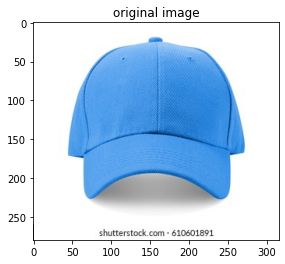

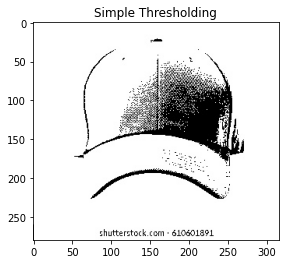

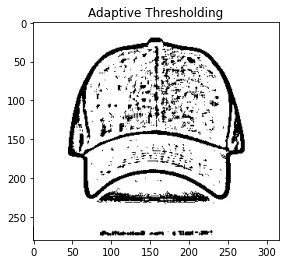

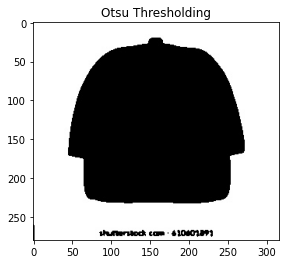

In [9]:

plt_imshow("original image",image0)
plt_imshow("Simple Thresholding",image1)
plt_imshow("Adaptive Thresholding",image2)
plt_imshow("Otsu Thresholding",image3)
